## 데이터 불러오기

In [1]:
import os

# 현재 작업 디렉토리를 가져옵니다.
current_directory = os.getcwd()

# 현재 작업 디렉토리를 출력합니다.
print(f'현재 작업 디렉토리: {current_directory}')


현재 작업 디렉토리: C:\Users\leeyh\Downloads


In [2]:
import os

# 변경할 디렉토리 경로를 지정합니다.
new_directory = r'C:\Users\leeyh\산업인공지능'

# 현재 작업 디렉토리를 변경합니다.
os.chdir(new_directory)

# 변경된 작업 디렉토리를 출력하여 확인합니다.
print(f'변경된 작업 디렉토리: {os.getcwd()}')


변경된 작업 디렉토리: C:\Users\leeyh\산업인공지능


In [3]:
import pandas as pd

df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('valid_data.csv')
df_test = pd.read_csv('test_data.csv')

In [4]:
# x_train, y_train 설정
x_train = pd.concat([df_train.iloc[:, 16:67], df_train.iloc[:, 106:207]], axis=1)
y_train = df_train.iloc[:, 5]

# x_valid, y_valid 설정
x_valid = pd.concat([df_valid.iloc[:, 16:67], df_valid.iloc[:, 106:207]], axis=1)
y_valid = df_valid.iloc[:, 5]

# x_test, y_test 설정
x_test = pd.concat([df_test.iloc[:, 16:67], df_test.iloc[:, 106:207]], axis=1)
y_test = df_test.iloc[:, 5]

In [5]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

(50051, 152)
(50051,)
(12513, 152)
(12513,)
(7820, 152)
(7820,)


## 기본 작업

In [6]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [ ]:
## 레이블 인코딩 작업

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels with value between 0 and n_classes-1
# XGBClassifier를 사용하기 위해 대상 레이블을 정수로 인코딩해야 합니다.
# 현재 대상 레이블은 범주형 문자열이므로, LabelEncoder를 사용하여 숫자로 변환해야 합니다.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)

# got ['in' 'noise' 'normal' 'other' 'out']---> 클래스를 정수로 인코딩: [0 1 2 3 4]

In [16]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
# XGBoost 모델 설정(default)

params = {}

In [18]:
## DMatrix 생성

In [9]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dvalid = xgb.DMatrix(data=x_valid, label=y_valid)

In [10]:
num_rounds = 100
evals = [(dtrain, 'train'), (dvalid, 'valid')]  # 평가용 데이터 세트
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=evals, verbose_eval=True)

[0]	train-rmse:1.41912	valid-rmse:1.43646
[1]	train-rmse:1.38736	valid-rmse:1.40630
[2]	train-rmse:1.35894	valid-rmse:1.37831
[3]	train-rmse:1.33760	valid-rmse:1.35843
[4]	train-rmse:1.31875	valid-rmse:1.34357
[5]	train-rmse:1.30526	valid-rmse:1.33188
[6]	train-rmse:1.29723	valid-rmse:1.32630
[7]	train-rmse:1.28774	valid-rmse:1.31755
[8]	train-rmse:1.26398	valid-rmse:1.29738
[9]	train-rmse:1.25384	valid-rmse:1.28857
[10]	train-rmse:1.24125	valid-rmse:1.27666
[11]	train-rmse:1.22522	valid-rmse:1.26146
[12]	train-rmse:1.22001	valid-rmse:1.25840
[13]	train-rmse:1.21346	valid-rmse:1.25280
[14]	train-rmse:1.20766	valid-rmse:1.24858
[15]	train-rmse:1.19509	valid-rmse:1.23892
[16]	train-rmse:1.18105	valid-rmse:1.22832
[17]	train-rmse:1.17619	valid-rmse:1.22470
[18]	train-rmse:1.16524	valid-rmse:1.21638
[19]	train-rmse:1.15182	valid-rmse:1.20646
[20]	train-rmse:1.14477	valid-rmse:1.20199
[21]	train-rmse:1.13223	valid-rmse:1.19316
[22]	train-rmse:1.12036	valid-rmse:1.18388
[23]	train-rmse:1.113

## 모델 평가

In [ ]:
## 모델 예측(수정후)

In [11]:
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

preds_train = np.asarray([np.argmax(line) for line in y_pred_train]) 
preds_valid = np.asarray([np.argmax(line) for line in y_pred_valid])

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 벨리드 데이터 예측
y_pred_train = model.predict(dtrain)
y_pred_valid = model.predict(dvalid)

# 학습 데이터 평가
print("Training Data Evaluation:")
get_clf_eval(y_train, preds_train)

# 벨리드 데이터 평가
print("\nValidation Data Evaluation:")
get_clf_eval(y_valid, preds_valid)

Training Data Evaluation:
Confusion Matrix:
[[10557     0     0     0     0]
 [ 4055     0     0     0     0]
 [15824     0     0     0     0]
 [ 5627     0     0     0     0]
 [13988     0     0     0     0]]
Accuracy: 0.2109, Precision: 0.0445, Recall: 0.2109, F1-score: 0.0735

Validation Data Evaluation:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#수정 전
#에러메시지: AxisError: axis 1 is out of bounds for array of dimension 1


#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import f1_score, roc_auc_score

#def get_clf_eval(y_true, y_pred):
#    confusion = confusion_matrix(y_true, y_pred)
#    accuracy = accuracy_score(y_true, y_pred)
#    precision = precision_score(y_true, y_pred, average='weighted')
#    recall = recall_score(y_true, y_pred, average='weighted')
#    f1 = f1_score(y_true, y_pred, average='weighted')

#    print("Confusion Matrix:")
#    print(confusion)
#    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 테스트 데이터 예측
#y_pred_train = model.predict(dtrain)
#y_pred_test = model.predict(dtest)

# 학습 데이터 평가
#print("Training Data Evaluation:")
#get_clf_eval(y_train, np.argmax(y_pred_train, axis=1))

# 테스트 데이터 평가
#print("\nTest Data Evaluation:")
#get_clf_eval(y_test, np.argmax(y_pred_test, axis=1))

## Feature importance 계산

In [ ]:
## 전제 Feature importance

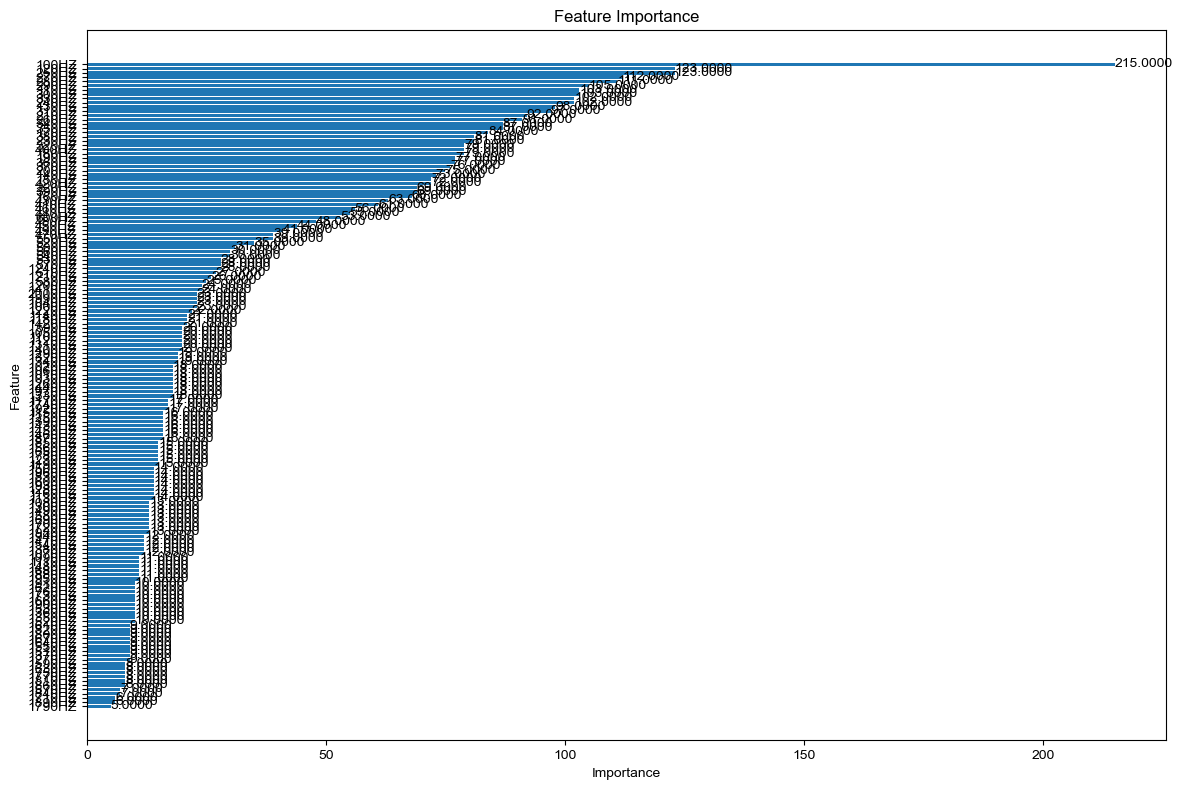

In [13]:
import matplotlib.pyplot as plt

# 폰트를 Arial로 설정
plt.rcParams['font.family'] = 'Arial'

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12, 8))

bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')

for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.tight_layout()
plt.show()


In [ ]:
## Feature importance 높은 순으로 feature 30개당 그래프 그리기

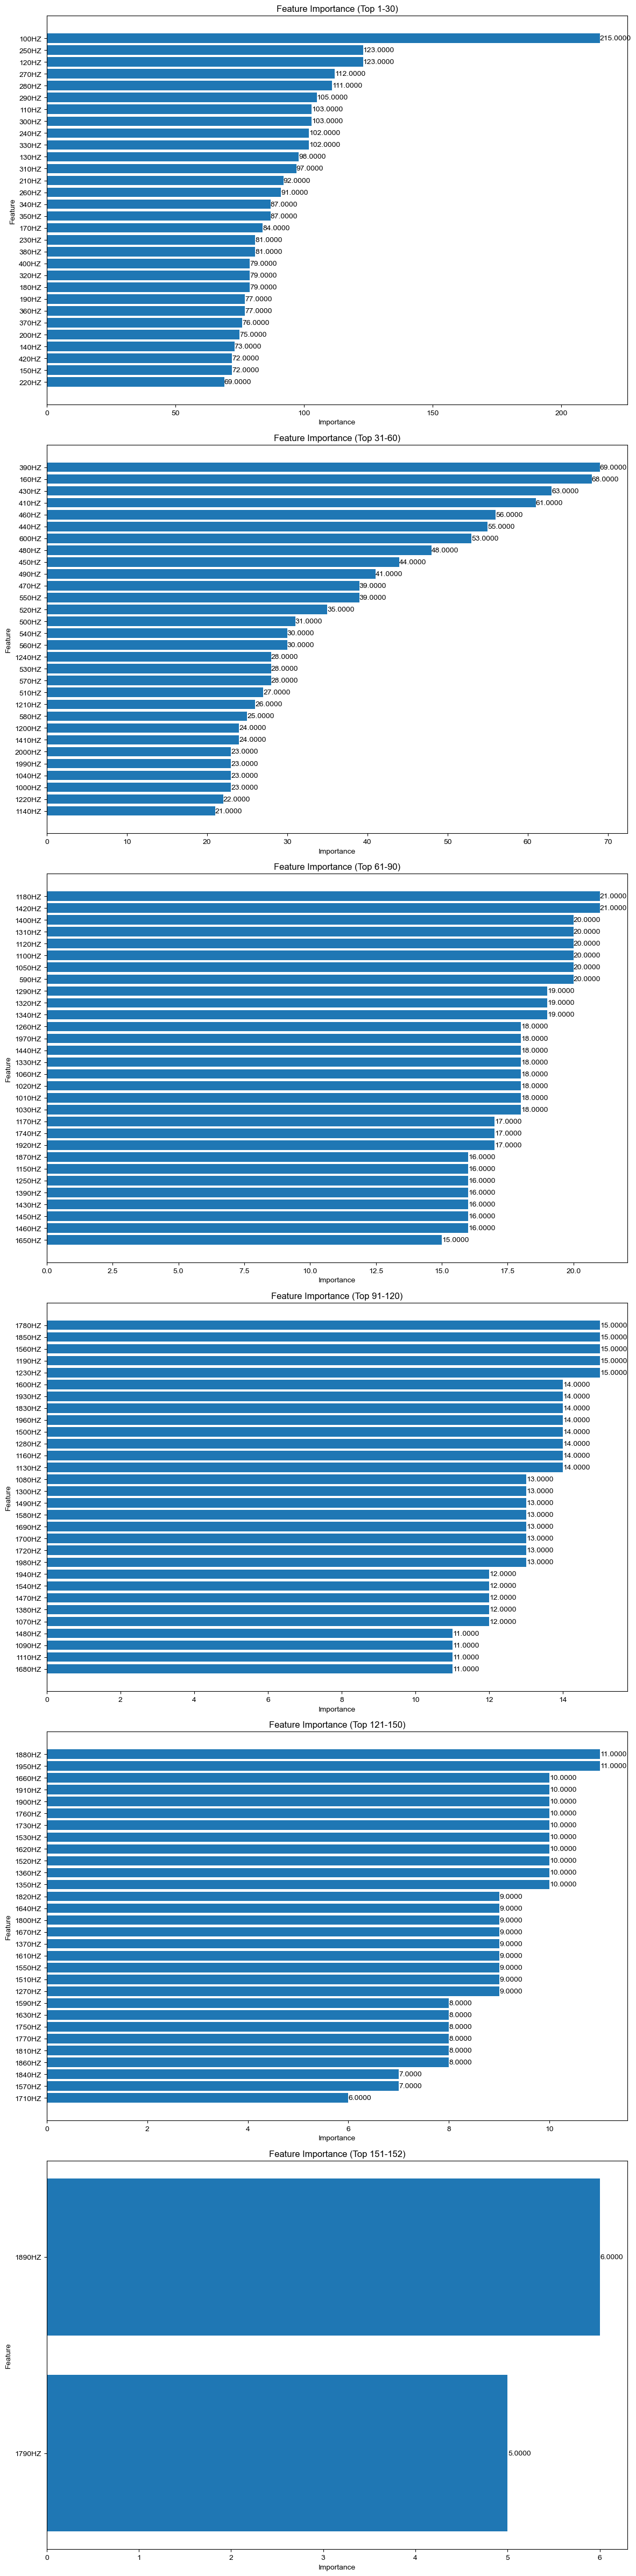

In [14]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
feature_names = [x[0] for x in sorted_importance]
importance_values = [x[1] for x in sorted_importance]

# 중요도를 가지고 있는 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 피처를 30개씩 나누어 그래프 생성
num_features = len(feature_importance_df)
num_subplots = (num_features // 30) + 1

plt.figure(figsize=(12, 8*num_subplots))

for i in range(num_subplots):
    start_idx = i * 30
    end_idx = min((i + 1) * 30, num_features)
    
    subset_df = feature_importance_df.iloc[start_idx:end_idx]
    subset_df = subset_df.sort_values(by='Importance', ascending=True)  # 중요도가 높은 순으로 정렬
    
    plt.subplot(num_subplots, 1, i+1)
    bars = plt.barh(subset_df['Feature'], subset_df['Importance'], align='center')
    
    for bar, importance in zip(bars, subset_df['Importance']):
        plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
                 va='center', ha='left', fontsize=10, color='black')

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance (Top {start_idx+1}-{end_idx})')

plt.tight_layout()
plt.show()


## 모델 재학습

In [16]:
## 상위 53개 변수들
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

# XGBoost 모델 재학습을 위한 상위 변수 선택
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(53)['Feature'].values

print("중요도가 높은 53개 변수들:",top_features)

중요도가 높은 53개 변수들: ['100HZ' '120HZ' '250HZ' '270HZ' '280HZ' '290HZ' '110HZ' '300HZ' '240HZ'
 '330HZ' '130HZ' '310HZ' '210HZ' '260HZ' '340HZ' '350HZ' '170HZ' '230HZ'
 '380HZ' '180HZ' '320HZ' '400HZ' '190HZ' '360HZ' '370HZ' '200HZ' '140HZ'
 '150HZ' '420HZ' '220HZ' '390HZ' '160HZ' '430HZ' '410HZ' '460HZ' '440HZ'
 '600HZ' '480HZ' '450HZ' '490HZ' '470HZ' '550HZ' '520HZ' '500HZ' '540HZ'
 '560HZ' '570HZ' '1240HZ' '530HZ' '510HZ' '1210HZ' '580HZ' '1200HZ']


In [17]:
# 상위 변수에 해당하는 데이터만 선택하여 새로운 DMatrix 생성
dtrain_top = xgb.DMatrix(data=x_train[top_features], label=y_train)
dvalid_top = xgb.DMatrix(data=x_valid[top_features], label=y_valid)

# XGBoost 모델 재학습
params = {}

model_top = xgb.train(params, dtrain_top, num_boost_round=100, evals=[(dtrain_top, 'train'), (dvalid_top, 'valid')], early_stopping_rounds=10, verbose_eval=10)

# 재학습된 모델에서 예측 수행
y_pred_train_top = model_top.predict(dtrain_top)
y_pred_valid_top = model_top.predict(dvalid_top)

# 예측값을 클래스로 변환
preds_train_top = np.asarray([np.argmax(line) for line in y_pred_train_top])
preds_valid_top = np.asarray([np.argmax(line) for line in y_pred_valid_top])

# 평가 함수 정의
def get_clf_eval(y_true, y_pred):
    confusion = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# 학습 데이터와 검증 데이터에 대해 평가
print("훈련 데이터 평가:")
get_clf_eval(y_train, preds_train_top)

print("\n검증 데이터 평가:")
get_clf_eval(y_valid, preds_valid_top)


[0]	train-rmse:1.41872	valid-rmse:1.43682
[10]	train-rmse:1.24254	valid-rmse:1.28385
[20]	train-rmse:1.13541	valid-rmse:1.20117
[30]	train-rmse:1.06776	valid-rmse:1.14776
[40]	train-rmse:0.98661	valid-rmse:1.09009
[50]	train-rmse:0.93789	valid-rmse:1.05530
[60]	train-rmse:0.89961	valid-rmse:1.02918
[70]	train-rmse:0.85902	valid-rmse:1.00355
[80]	train-rmse:0.82633	valid-rmse:0.98468
[90]	train-rmse:0.78721	valid-rmse:0.95883
[99]	train-rmse:0.75817	valid-rmse:0.93980
훈련 데이터 평가:
Confusion Matrix:
[[10557     0     0     0     0]
 [ 4055     0     0     0     0]
 [15824     0     0     0     0]
 [ 5627     0     0     0     0]
 [13988     0     0     0     0]]
Accuracy: 0.2109, Precision: 0.0445, Recall: 0.2109, F1-score: 0.0735

검증 데이터 평가:
Confusion Matrix:
[[2716    0    0    0    0]
 [ 974    0    0    0    0]
 [3880    0    0    0    0]
 [1392    0    0    0    0]
 [3551    0    0    0    0]]
Accuracy: 0.2171, Precision: 0.0471, Recall: 0.2171, F1-score: 0.0774


C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leeyh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
